In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing datasets
credits_data = pd.read_csv("credits.csv")
titles_data = pd.read_csv("titles.csv") 


In [3]:
#exploring the datasets
credits_data.shape

(124235, 5)

In [4]:
titles_data.shape

(9871, 15)

In [5]:
titles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [6]:
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [7]:
titles_data.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [8]:
titles_data.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [9]:
credits_data.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [10]:
credits_data.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


<AxesSubplot:title={'center':'Movie vs Show Content'}, xlabel='type', ylabel='count'>

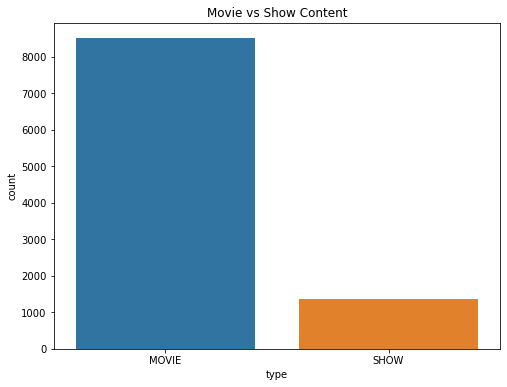

In [15]:
# Movie vs Show content of top 20 years when highest number movies and TV shows were produced
plt.figure(figsize = (8,6))
plt.title('Movie vs Show Content')
sns.countplot(x='type', data = titles_data,order = titles_data['type'].value_counts().index[:20] ,linewidth =5)


In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [28]:
#percentage of movies and shows content
col = "type"
grouped = titles_data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]), title= "Movie vs Show Content")
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

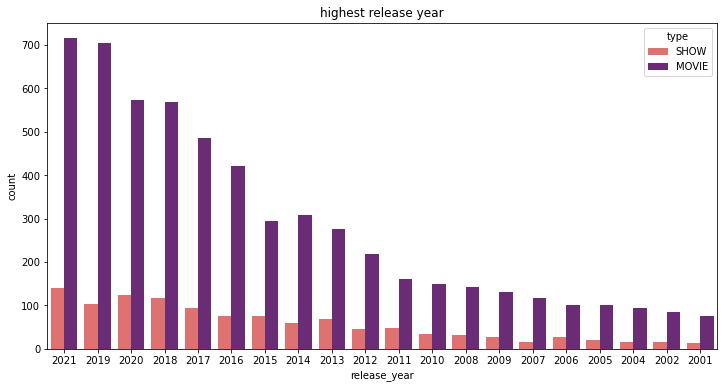

In [31]:
#Top 20 years when highest movies and TV shows were produced
fig = plt.figure(figsize=(12,6))
sns.countplot(data = titles_data,x = 'release_year', order = titles_data["release_year"].value_counts().index[0:20],hue = 'type',palette = 'magma_r')
plt.title("highest release year")
plt.show()

In [34]:
#replace null values with unknown
titles_data['production_countries'] = titles_data['production_countries'].str[2:4]
for i in range(len(titles_data['production_countries'])):
    if titles_data['production_countries'][i] == '':
        titles_data['production_countries'][i] = 'Unknown'

<ipython-input-34-edd5c96439e4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



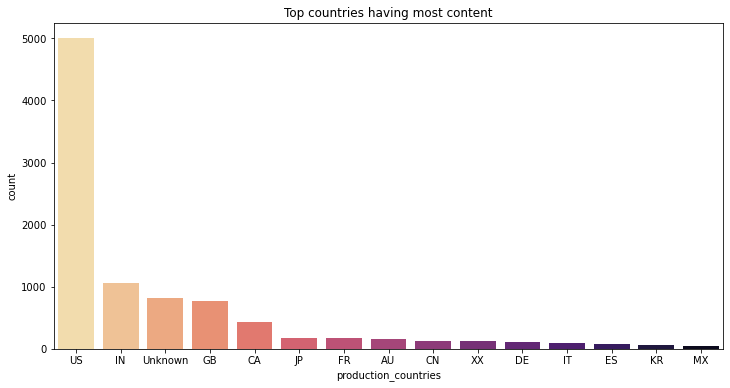

In [36]:
#Top countries having most content
fig = plt.figure(figsize=(12,6))
sns.countplot(data = titles_data,x= 'production_countries', order = titles_data["production_countries"].value_counts().index[0:15],palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()
        

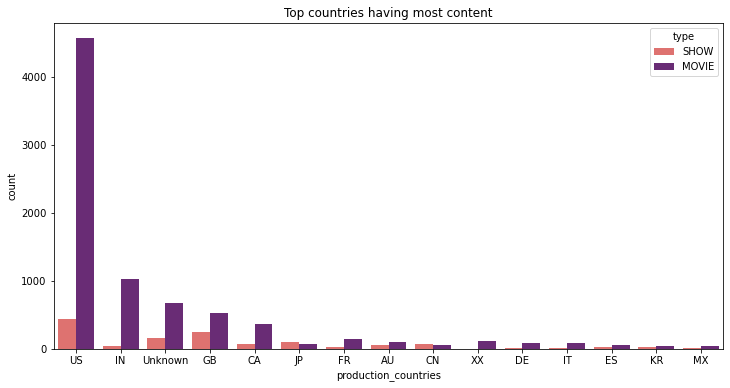

In [37]:
#Top countries having most content
fig = plt.figure(figsize=(12,6))
sns.countplot(data = titles_data,x= 'production_countries', order = titles_data["production_countries"].value_counts().index[0:15],hue='type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()
        

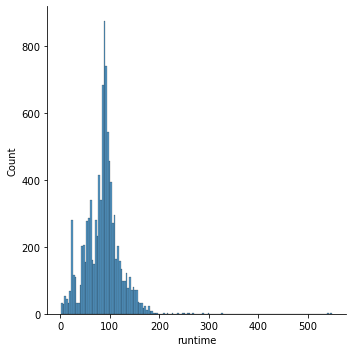

In [41]:
# Distribution of movie runtime
figsize=(20,15)
sns.displot(titles_data['runtime']) 

In [42]:
#movies and shows with highest votes
titles_data.sort_values(by = 'imdb_votes', ascending = False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2220,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"['drama', 'romance']",US,NaN,tt0120338,7.9,1133692.0,127.413,7.9
2230,tm7320,The Usual Suspects,MOVIE,"Held in an L.A. interrogation room, Verbal Kin...",1995,R,106,"['thriller', 'crime', 'drama']",US,NaN,tt0114814,8.5,1059480.0,22.233,8.2
2237,tm12503,Braveheart,MOVIE,"Enraged at the slaughter of Murron, his new br...",1995,R,177,"['drama', 'history', 'war']",US,NaN,tt0112573,8.4,1016629.0,42.208,7.9
2229,tm55542,The Sixth Sense,MOVIE,"Following an unexpected tragedy, a child psych...",1999,PG-13,107,"['thriller', 'drama']",US,NaN,tt0167404,8.2,967864.0,29.333,7.9
1814,tm163236,The Terminator,MOVIE,"In the post-apocalyptic future, reigning tyran...",1984,R,108,"['thriller', 'action', 'scifi']",US,NaN,tt0088247,8.1,841706.0,51.819,7.6
2810,ts10620,Dexter,SHOW,"Dexter Morgan, a blood spatter pattern analyst...",2006,TV-MA,53,"['drama', 'thriller', 'crime']",US,8.0,tt0773262,8.7,711566.0,81.642,8.2
4102,tm72846,Skyfall,MOVIE,When Bond's latest assignment goes gravely wro...,2012,PG-13,143,"['thriller', 'action']",US,NaN,tt1074638,7.8,684779.0,62.264,7.2
2824,tm136410,District 9,MOVIE,"Thirty years ago, aliens arrive on Earth. Not ...",2009,R,113,"['scifi', 'thriller', 'action']",ZA,NaN,tt1136608,7.9,670344.0,80.387,7.4
5293,tm205861,Arrival,MOVIE,Taking place after alien crafts land around th...,2016,PG-13,112,"['drama', 'scifi', 'thriller']",US,NaN,tt2543164,7.9,669220.0,67.165,7.6
2228,tm106648,Fargo,MOVIE,"Jerry, a small-town Minnesota car salesman is ...",1996,R,98,"['thriller', 'crime', 'drama']",GB,NaN,tt0116282,8.1,663221.0,19.393,7.9


In [43]:
#movies and shows with lowest votes
titles_data.sort_values(by = 'imdb_votes').head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1936,ts17762,Babar,SHOW,Babar is a Canadian/French/Japanese animated t...,1989,TV-G,24,"['animation', 'comedy', 'drama', 'family', 'fa...",CA,6.0,tt0156200,6.6,5.0,3.894,6.7
6112,ts141906,Life in a Tide Pool,SHOW,The series Life in a Tide Pool explores the fa...,2015,NaN,26,['documentation'],US,1.0,tt4755490,6.4,5.0,NaN,NaN
8835,tm1103150,Balance,MOVIE,The story builds on two normal middle class fa...,2019,NaN,120,"['comedy', 'drama', 'family']",Unknown,NaN,tt7778944,7.2,5.0,NaN,NaN
8278,tm518241,Blackwater,MOVIE,"A Feature western genre film, 60 minutes in le...",2019,NaN,62,['action'],AU,NaN,tt7094562,4.4,5.0,1.755,NaN
6931,ts118548,Imada x Higashino no Carigyura,SHOW,"In this variety series, hosts Koji Imada and K...",2017,TV-14,43,['reality'],JP,2.0,tt7329308,6.2,5.0,1.259,8.5
6976,ts120392,Visions of Greatness,SHOW,Fury in the Pacific is a documentary about a p...,2017,NaN,25,[],Unknown,1.0,tt7097712,7.0,5.0,0.600,NaN
1229,tm366,Doc,MOVIE,"A revisionist western, ""Doc"" is Frank Perry's ...",1971,PG,96,"['western', 'comedy']",US,NaN,tt0067003,4.4,5.0,3.783,6.2
9660,tm1041408,Harmony McElligott: The Struggle Continues,MOVIE,Emmy nominated writer and comedian Harmony McE...,2021,NaN,60,['comedy'],XX,NaN,tt14468194,7.6,5.0,NaN,NaN
9608,tm1157446,Don Jediondo: Totiese de la Risa,MOVIE,NaN,2021,NaN,46,['comedy'],Unknown,NaN,tt16612542,4.4,5.0,1.178,NaN
9805,tm1090119,I Write My Life,MOVIE,Main character Sophie wants to make her life m...,2021,NaN,90,['drama'],Unknown,NaN,tt15170424,5.6,5.0,0.670,NaN


In [44]:
# show with maximum number os seasons
titles_data[titles_data['seasons'] == titles_data['seasons'].max()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1010,ts36796,Great Performances,SHOW,The best in the performing arts from across Am...,1971,NaN,116,"['drama', 'comedy']",US,51.0,NaN,NaN,NaN,27.555,6.7


In [46]:
# Highest rated shows with 5 seasons or more
titles_data[titles_data['seasons'] >= 5].sort_values(by = 'imdb_votes', ascending = False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2810,ts10620,Dexter,SHOW,"Dexter Morgan, a blood spatter pattern analyst...",2006,TV-MA,53,"['drama', 'thriller', 'crime']",US,8.0,tt0773262,8.7,711566.0,81.642,8.2
2807,ts21483,How I Met Your Mother,SHOW,A father recounts to his children - through a ...,2005,TV-14,24,"['comedy', 'romance']",US,9.0,tt0460649,8.3,661972.0,153.898,8.2
4573,ts22413,Vikings,SHOW,"The adventures of Ragnar Lothbrok, the greates...",2013,TV-MA,45,"['action', 'drama', 'war', 'history', 'romance...",CA,6.0,tt2306299,8.5,508388.0,344.245,8.1
2808,ts22280,House,SHOW,"Dr. Gregory House, a drug-addicted, unconventi...",2004,TV-14,44,"['drama', 'comedy']",US,8.0,tt0412142,8.7,448480.0,286.211,8.6
5287,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"['comedy', 'drama', 'crime']",US,6.0,tt3032476,8.8,404920.0,352.657,8.5
4099,ts22277,Suits,SHOW,"While running from a drug deal gone bad, Mike ...",2011,TV-14,44,"['drama', 'comedy']",US,9.0,tt1632701,8.5,395600.0,356.533,8.1
4100,ts5746,American Horror Story,SHOW,An anthology horror drama series centering on ...,2011,TV-MA,45,"['scifi', 'drama', 'thriller', 'crime', 'horror']",US,10.0,tt1844624,8.0,304893.0,149.195,8.1
2812,ts8308,Community,SHOW,Follow the lives of a group of students at wha...,2009,TV-PG,23,['comedy'],US,6.0,tt1439629,8.5,252564.0,48.311,8.0
2809,ts21608,Scrubs,SHOW,"In the unreal world of Sacred Heart Hospital, ...",2001,TV-14,24,"['comedy', 'drama']",US,9.0,tt0285403,8.4,251172.0,73.230,8.0
2806,ts11,Downton Abbey,SHOW,A chronicle of the lives of the aristocratic C...,2010,TV-14,58,"['drama', 'romance', 'european']",GB,6.0,tt1606375,8.7,197744.0,57.029,8.1


In [50]:
# filtering data for movies only
data = titles_data[titles_data['type'] == "MOVIE"]

In [51]:
data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",US,NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",US,NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",US,NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",US,NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",US,NaN,tt0031971,7.8,48149.0,11.786,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,tm822572,Gun and a Hotel Bible,MOVIE,"Based on the original play, Gun and a Hotel Bi...",2021,NaN,58,['drama'],Unknown,NaN,tt10661500,4.0,142.0,0.954,6.5
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],US,NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],US,NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],IN,NaN,NaN,NaN,NaN,1.960,NaN


In [52]:
# checking whether there is a movie with seasons
data[data['seasons'] > 0].sort_values(by = 'imdb_votes', ascending = False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


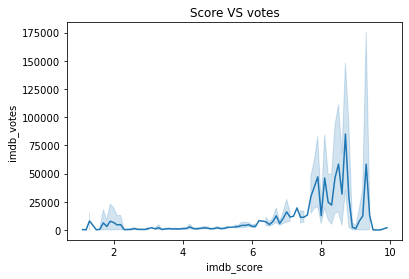

In [56]:
# ploting score vs votes
sns.lineplot(x=titles_data["imdb_score"], y=titles_data["imdb_votes"])
plt.title("Score VS votes")
plt.show()

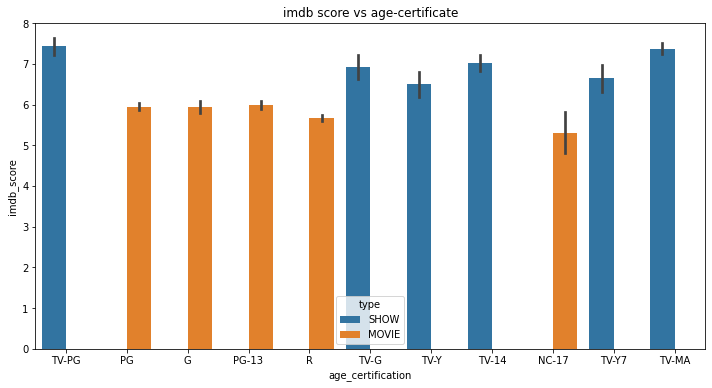

In [82]:
#imdb score vs age-certificate
fig = plt.figure(figsize=(12,6))
sns.barplot(data = titles_data,y= 'imdb_score', x= 'age_certification',hue='type')
plt.title("imdb score vs age-certificate")
plt.show()
        